In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import apriltag
import skimage as ski
from skimage.morphology import erosion, square, disk
from skimage.filters import sobel
import cv2
import time

In [3]:
def show_image(image, title=""):
    plt.axis('off')
    plt.imshow(image, cmap='gray')
    plt.title(title)
    plt.show()

In [4]:
def count_detected_april_tags(image):
    options = apriltag.DetectorOptions(families="tag16h5")
    detector = apriltag.Detector(options)
    results = detector.detect(np.asarray(image * 255, np.uint8))
    return len(results), results

In [5]:
def find_best_erosion_kernel(image, kernels):
    best_kernel = kernels[0]
    max_found_tags = 0
    for kernel in kernels:
        mod_image = erosion(image, kernel)
        found_tags, _ = count_detected_april_tags(mod_image)
        if found_tags > max_found_tags:
            best_kernel = kernel
            max_found_tags = found_tags
    return best_kernel

In [6]:
def calculate_mse(image1, image2):
    return np.mean((image1 - image2) ** 2)

In [7]:
total_tags_detected = 0
total_execution_time = 0
total_intensity_change = 0
total_edge_preservation = 0
total_contrast_loss = 0

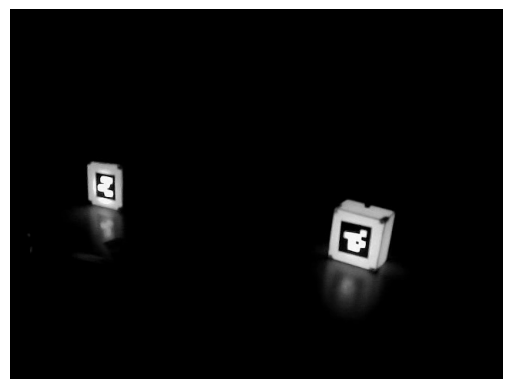

In [27]:
# load image

original_image = ski.io.imread('samples/frame2.png')
image = ski.color.rgb2gray(original_image)

show_image(image)

2


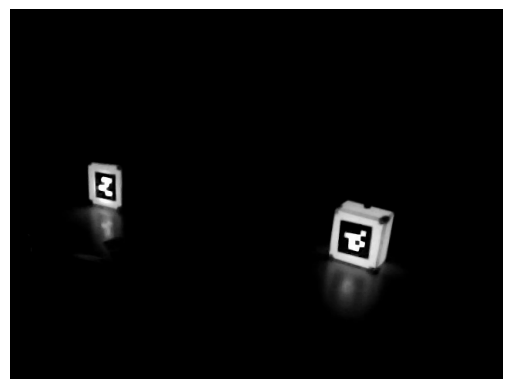

In [29]:
kernel = find_best_erosion_kernel(image, [square(1), square(3), square(5), square(7), disk(3), disk(5), disk(7)])
image = erosion(image, kernel)
found_tags = count_detected_april_tags(image)
print(found_tags)

show_image(image)

[INFO] tag: 1
[INFO] tag: 3


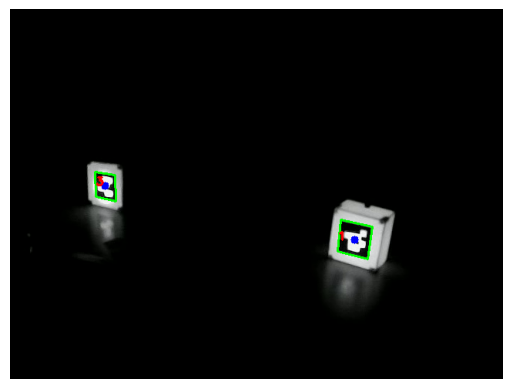

In [30]:
options = apriltag.DetectorOptions(families="tag16h5")
detector = apriltag.Detector(options)
results = detector.detect(np.asarray(image * 255, np.uint8))

# loop over the AprilTag detection results
for r in results:
	# extract the bounding box (x, y)-coordinates for the AprilTag
	# and convert each of the (x, y)-coordinate pairs to integers
	(ptA, ptB, ptC, ptD) = r.corners
	ptB = (int(ptB[0]), int(ptB[1]))
	ptC = (int(ptC[0]), int(ptC[1]))
	ptD = (int(ptD[0]), int(ptD[1]))
	ptA = (int(ptA[0]), int(ptA[1]))
	# draw the bounding box of the AprilTag detection
	cv2.line(original_image, ptA, ptB, (0, 255, 0), 2)
	cv2.line(original_image, ptB, ptC, (0, 255, 0), 2)
	cv2.line(original_image, ptC, ptD, (0, 255, 0), 2)
	cv2.line(original_image, ptD, ptA, (0, 255, 0), 2)
	# draw the center (x, y)-coordinates of the AprilTag
	(cX, cY) = (int(r.center[0]), int(r.center[1]))
	cv2.circle(original_image, (cX, cY), 5, (0, 0, 255), -1)
	# draw the tag family on the image
	tagFamily = r.tag_family.decode("utf-8")
	cv2.putText(original_image, str(r.tag_id), (ptA[0], ptA[1] - 15),
		cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)
	print("[INFO] tag: {}".format(r.tag_id))
show_image(original_image)

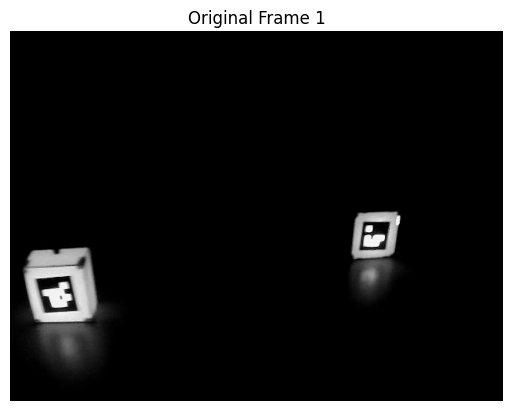

[FRAME 1]
Tags Detected: 2
Execution Time: 0.1437 seconds
Intensity Change: 0.0049
Edge Preservation (1 - MSE): 0.9991
Contrast Loss: 0.0145


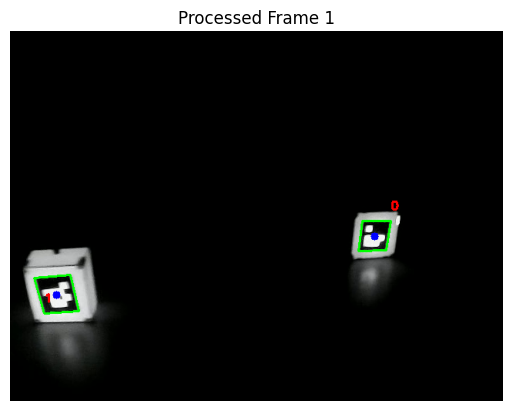

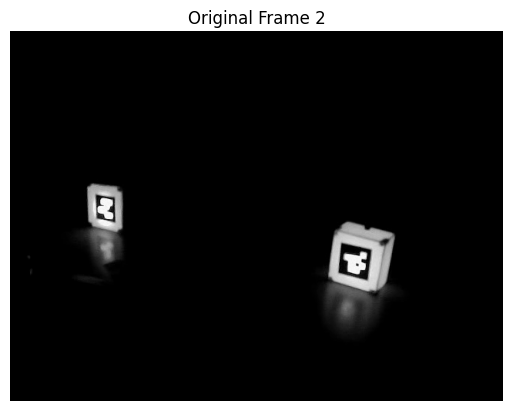

[FRAME 2]
Tags Detected: 2
Execution Time: 0.1374 seconds
Intensity Change: 0.0041
Edge Preservation (1 - MSE): 0.9993
Contrast Loss: 0.0142


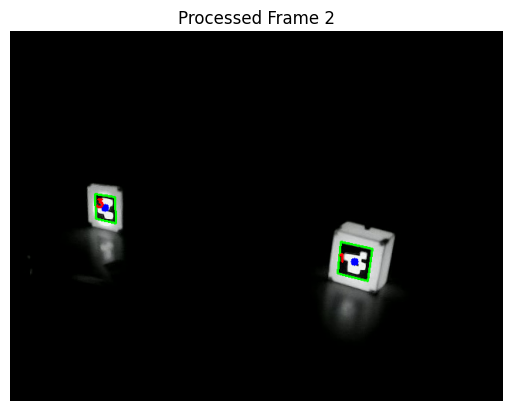

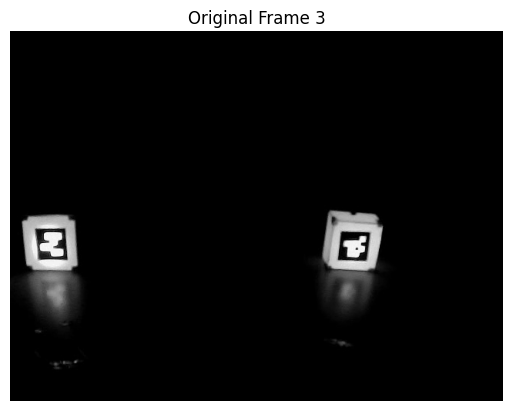

[FRAME 3]
Tags Detected: 2
Execution Time: 0.1480 seconds
Intensity Change: 0.0000
Edge Preservation (1 - MSE): 1.0000
Contrast Loss: 0.0000


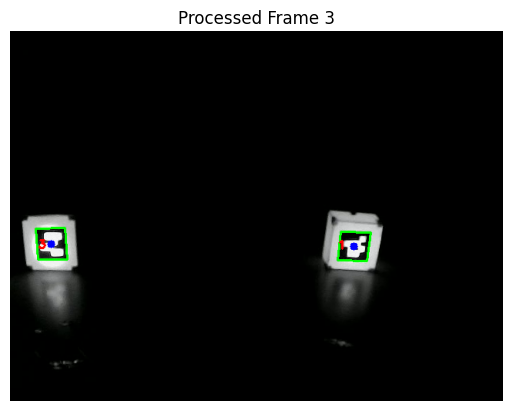

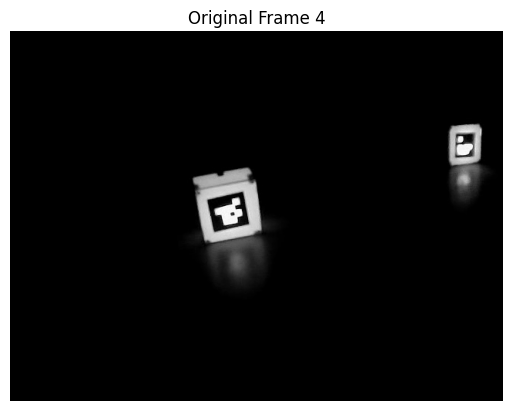

[FRAME 4]
Tags Detected: 2
Execution Time: 0.1342 seconds
Intensity Change: 0.0040
Edge Preservation (1 - MSE): 0.9993
Contrast Loss: 0.0139


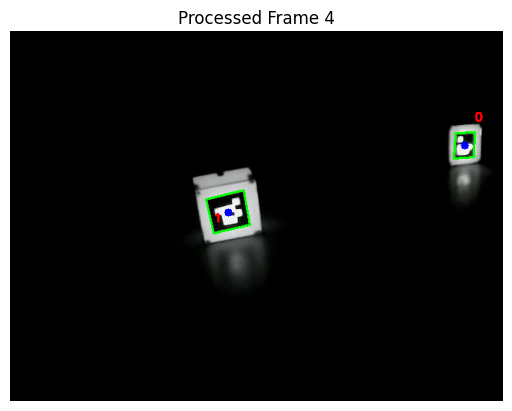

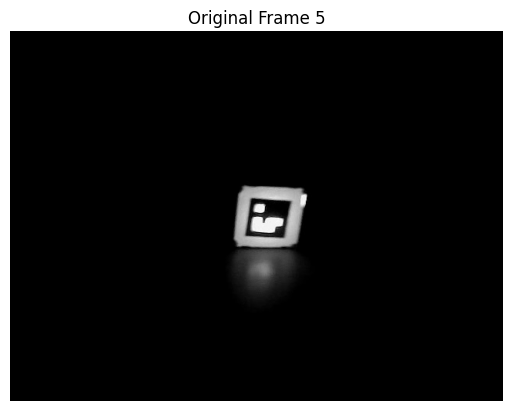

[FRAME 5]
Tags Detected: 1
Execution Time: 0.1339 seconds
Intensity Change: 0.0000
Edge Preservation (1 - MSE): 1.0000
Contrast Loss: 0.0000


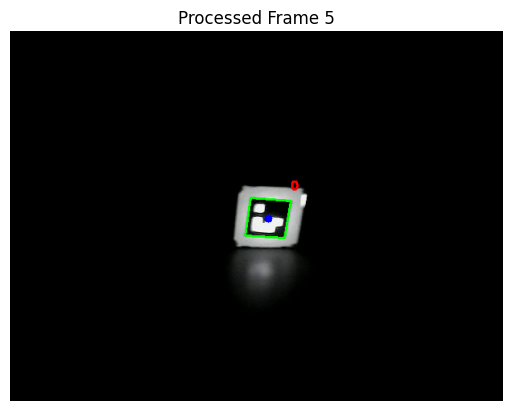

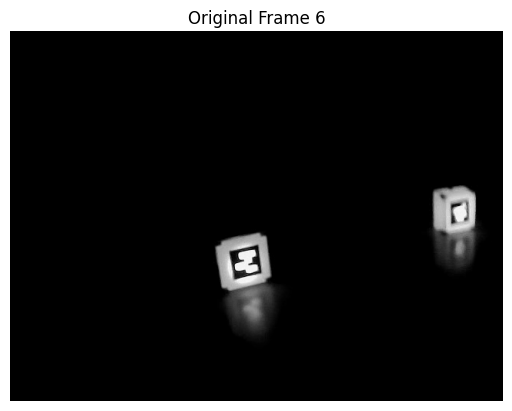

[FRAME 6]
Tags Detected: 1
Execution Time: 0.1482 seconds
Intensity Change: 0.0000
Edge Preservation (1 - MSE): 1.0000
Contrast Loss: 0.0000


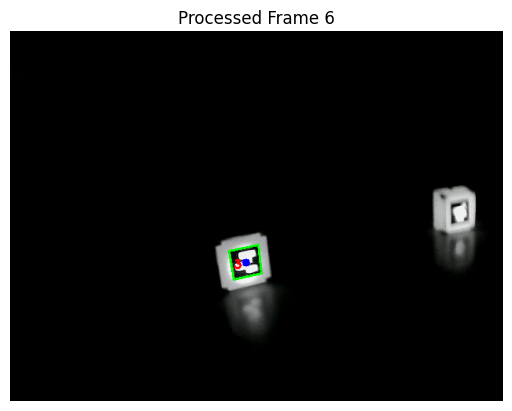

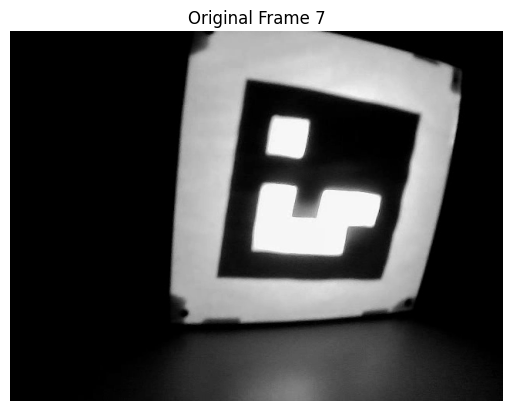

[FRAME 7]
Tags Detected: 1
Execution Time: 0.1849 seconds
Intensity Change: 0.0000
Edge Preservation (1 - MSE): 1.0000
Contrast Loss: 0.0000


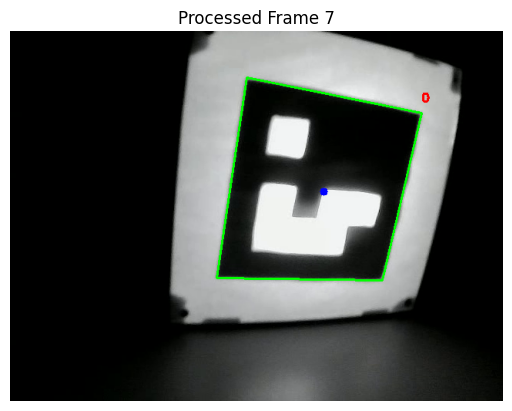

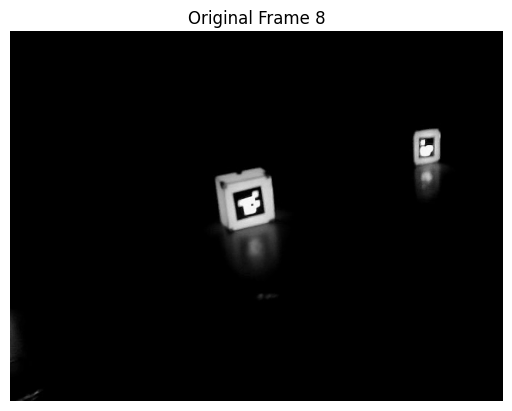

[FRAME 8]
Tags Detected: 2
Execution Time: 0.1473 seconds
Intensity Change: 0.0033
Edge Preservation (1 - MSE): 0.9995
Contrast Loss: 0.0130


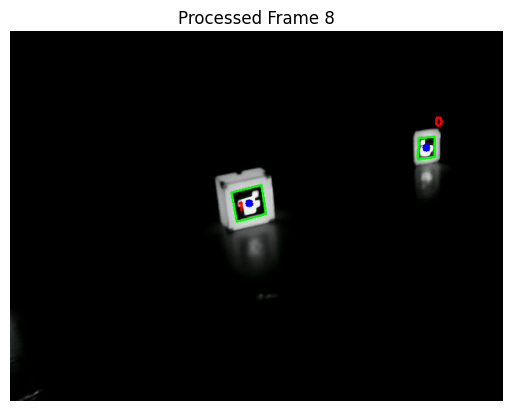

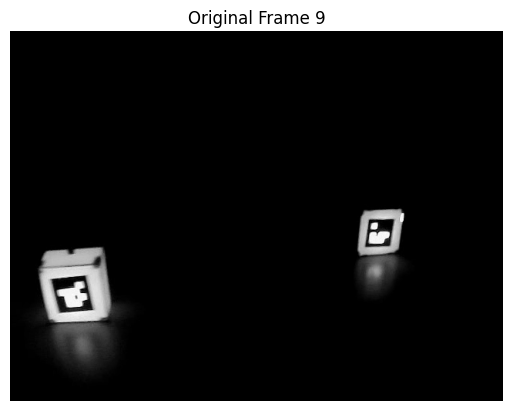

[FRAME 9]
Tags Detected: 2
Execution Time: 0.1387 seconds
Intensity Change: 0.0048
Edge Preservation (1 - MSE): 0.9992
Contrast Loss: 0.0144


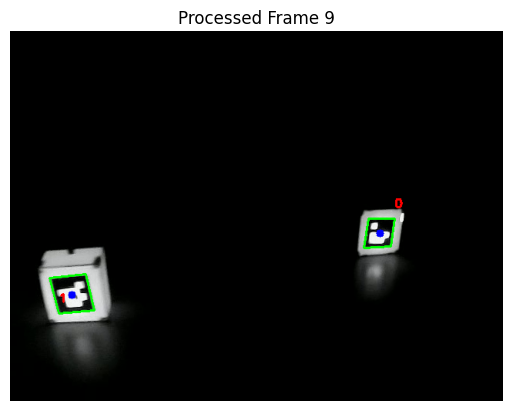

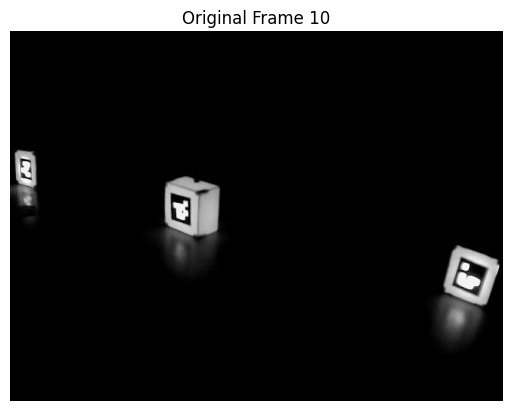

[FRAME 10]
Tags Detected: 2
Execution Time: 0.1393 seconds
Intensity Change: 0.0051
Edge Preservation (1 - MSE): 0.9992
Contrast Loss: 0.0169


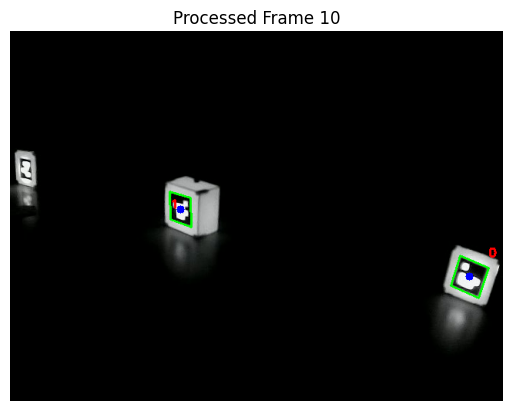

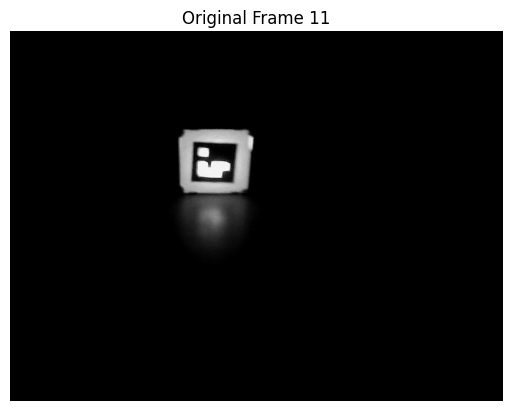

[FRAME 11]
Tags Detected: 1
Execution Time: 0.1379 seconds
Intensity Change: 0.0000
Edge Preservation (1 - MSE): 1.0000
Contrast Loss: 0.0000


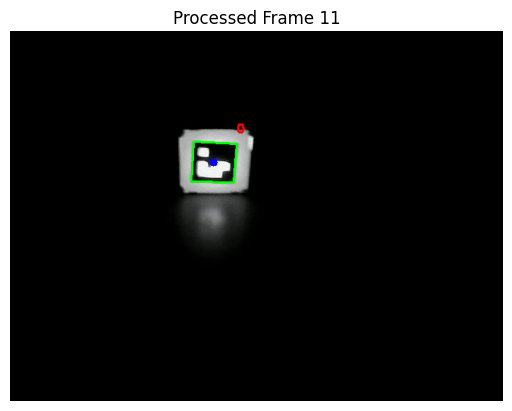

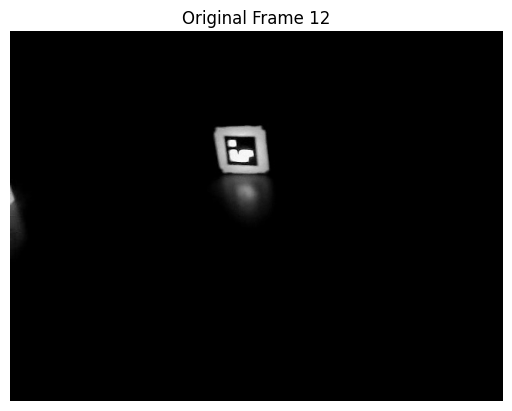

[FRAME 12]
Tags Detected: 1
Execution Time: 0.1401 seconds
Intensity Change: 0.0000
Edge Preservation (1 - MSE): 1.0000
Contrast Loss: 0.0000


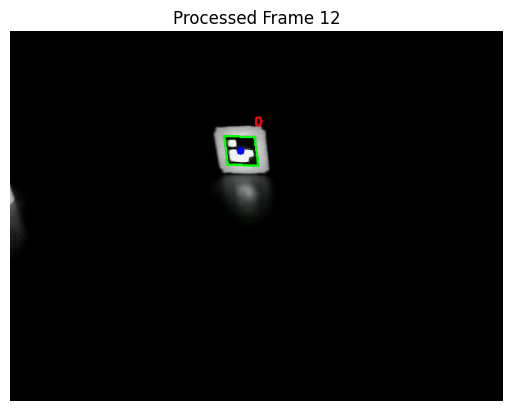

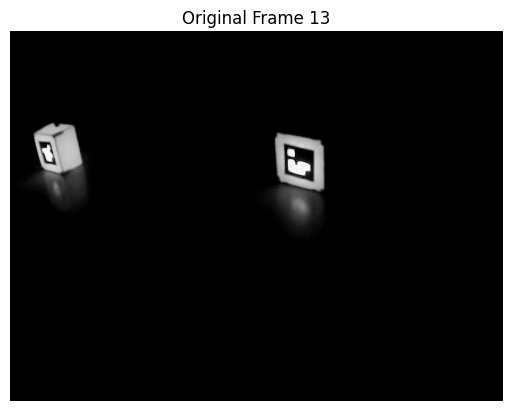

[FRAME 13]
Tags Detected: 1
Execution Time: 0.1477 seconds
Intensity Change: 0.0000
Edge Preservation (1 - MSE): 1.0000
Contrast Loss: 0.0000


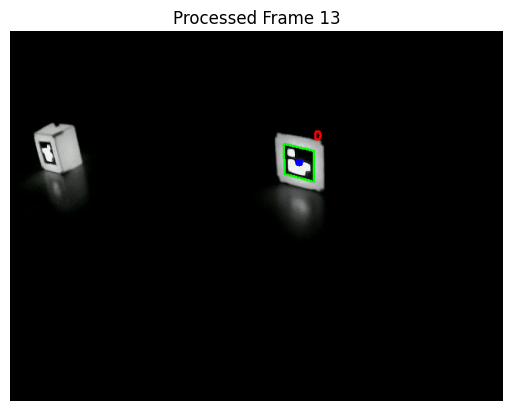

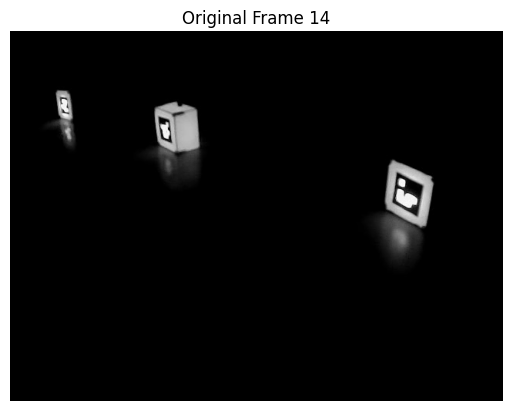

[FRAME 14]
Tags Detected: 2
Execution Time: 0.1417 seconds
Intensity Change: 0.0041
Edge Preservation (1 - MSE): 0.9993
Contrast Loss: 0.0153


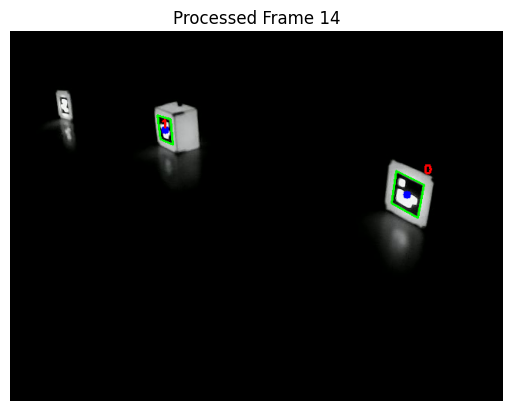

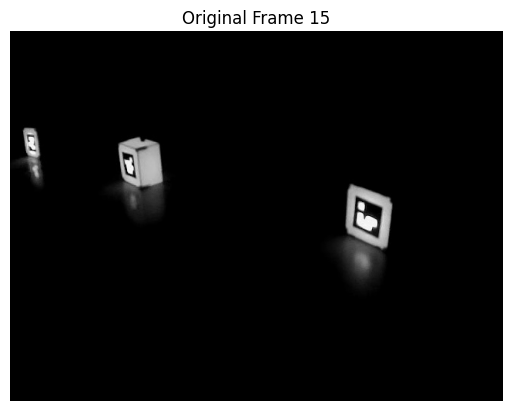

[FRAME 15]
Tags Detected: 2
Execution Time: 0.1400 seconds
Intensity Change: 0.0040
Edge Preservation (1 - MSE): 0.9994
Contrast Loss: 0.0151


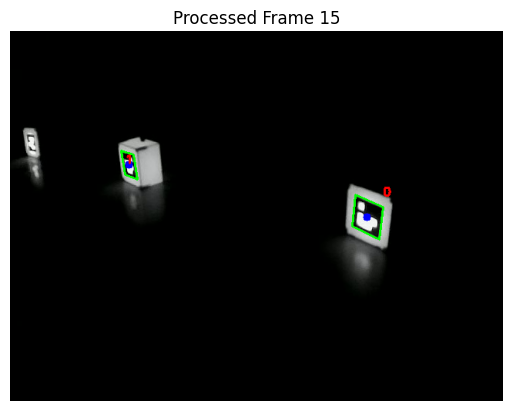

In [8]:
for frame_num in range(1, 16):
    filename = f'samples/frame{frame_num}.png'
    original_image = ski.io.imread(filename)
    gray_image = ski.color.rgb2gray(original_image)
    
    # Show initial frame
    show_image(gray_image, title=f"Original Frame {frame_num}")
    
    # Start timing the execution
    start_time = time.time()

    # Calculate initial contrast and edge preservation metrics
    initial_contrast = gray_image.std()
    initial_edges = sobel(gray_image)

    # Perform erosion with optimal kernel
    kernel = find_best_erosion_kernel(gray_image, [square(1), square(3), square(5), square(7), disk(3), disk(5), disk(7)])
    eroded_image = erosion(gray_image, kernel)

    # Measure tag detection on eroded image
    found_tags, results = count_detected_april_tags(eroded_image)
    total_tags_detected += found_tags

    # Calculate post-processing metrics
    intensity_change = np.abs(gray_image - eroded_image).mean()
    post_contrast = eroded_image.std()
    post_edges = sobel(eroded_image)
    edge_preservation = 1 - calculate_mse(initial_edges, post_edges)  # Measure edge preservation by MSE
    contrast_loss = initial_contrast - post_contrast

    # Accumulate metrics
    total_execution_time += time.time() - start_time
    total_intensity_change += intensity_change
    total_edge_preservation += edge_preservation
    total_contrast_loss += contrast_loss

    # Display results on image and print tag details
    for r in results:
        (ptA, ptB, ptC, ptD) = r.corners
        ptA, ptB, ptC, ptD = (int(ptA[0]), int(ptA[1])), (int(ptB[0]), int(ptB[1])), (int(ptC[0]), int(ptC[1])), (int(ptD[0]), int(ptD[1]))

        cv2.line(original_image, ptA, ptB, (0, 255, 0), 2)
        cv2.line(original_image, ptB, ptC, (0, 255, 0), 2)
        cv2.line(original_image, ptC, ptD, (0, 255, 0), 2)
        cv2.line(original_image, ptD, ptA, (0, 255, 0), 2)

        (cX, cY) = (int(r.center[0]), int(r.center[1]))
        cv2.circle(original_image, (cX, cY), 5, (0, 0, 255), -1)
        tag_id = r.tag_id
        cv2.putText(original_image, str(tag_id), (ptA[0], ptA[1] - 15), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

    print(f"[FRAME {frame_num}]")
    print(f"Tags Detected: {found_tags}")
    print(f"Execution Time: {time.time() - start_time:.4f} seconds")
    print(f"Intensity Change: {intensity_change:.4f}")
    print(f"Edge Preservation (1 - MSE): {edge_preservation:.4f}")
    print(f"Contrast Loss: {contrast_loss:.4f}")
    print("="*30)

    # Show processed image with tag annotations
    show_image(original_image, title=f"Processed Frame {frame_num}")

In [9]:
avg_tags_detected = total_tags_detected / 15
avg_execution_time = total_execution_time / 15
avg_intensity_change = total_intensity_change / 15
avg_edge_preservation = total_edge_preservation / 15
avg_contrast_loss = total_contrast_loss / 15

In [10]:
print("[FINAL AVERAGES ACROSS 15 FRAMES]")
print(f"Average Tags Detected: {avg_tags_detected}")
print(f"Average Execution Time: {avg_execution_time:.4f} seconds")
print(f"Average Intensity Change: {avg_intensity_change:.4f}")
print(f"Average Edge Preservation: {avg_edge_preservation:.4f}")
print(f"Average Contrast Loss: {avg_contrast_loss:.4f}")

[FINAL AVERAGES ACROSS 15 FRAMES]
Average Tags Detected: 1.6
Average Execution Time: 0.1437 seconds
Average Intensity Change: 0.0023
Average Edge Preservation: 0.9996
Average Contrast Loss: 0.0078
